## NUKALA NAGA PAVAN

# Mini project (Data science using Python)


## Part - 1
We shall now test your skills in using Pandas package. We will be using the [games Dataset](https://www.kaggle.com/gutsyrobot/games-data/data) from Kaggle. 

Answer each question asked below wrt the games dataset.

** Import pandas as pd.**

In [1]:
import pandas as pd

** Read games.csv as a dataframe called games.**

In [2]:
games = pd.read_csv('games-1.csv')

** Check the head of the DataFrame. **

In [3]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,1,boardgame,Twilight Struggle,2005,2,2,180,180,180,13,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2,boardgame,Terra Mystica,2012,2,5,150,60,150,12,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,3,boardgame,Caverna: The Cave Farmers,2013,1,7,210,30,210,12,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,4,boardgame,Through the Ages: A Story of Civilization,2006,2,4,240,240,240,12,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,5,boardgame,Puerto Rico,2002,2,5,150,90,150,12,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


** Use .info() method to find out total number of entries in dataset**

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 20 columns):
id                      2665 non-null int64
type                    2665 non-null object
name                    2665 non-null object
yearpublished           2665 non-null int64
minplayers              2665 non-null int64
maxplayers              2665 non-null int64
playingtime             2665 non-null int64
minplaytime             2665 non-null int64
maxplaytime             2665 non-null int64
minage                  2665 non-null int64
users_rated             2665 non-null int64
average_rating          2665 non-null float64
bayes_average_rating    2665 non-null float64
total_owners            2665 non-null int64
total_traders           2665 non-null int64
total_wanters           2665 non-null int64
total_wishers           2665 non-null int64
total_comments          2665 non-null int64
total_weights           2665 non-null int64
average_weight          2665 non-null float64
dtype

**What is the mean playin time for all games put together ?**

In [5]:
games['playingtime'].mean()

105.03489681050657

** What is the highest number of comments received for a game? **

In [6]:
games['total_comments'].max()

11798

** What is the name of the game with id 1500?  **

In [7]:
games[games['id']==1500]['name']

1499    El Grande: Knig & Intrigant
Name: name, dtype: object

** And which year was it published? **

In [8]:
games[games['id']==1500]['yearpublished']

1499    1997
Name: yearpublished, dtype: int64

** Which game has received highest number of comments? **

In [9]:
games[games['total_comments']==games['total_comments'].max()]['name']

165    Catan
Name: name, dtype: object

** Which games have received least number of comments? **

In [10]:
games.loc[games['total_comments']==games['total_comments'].min()]['name']

1572      Fire On The Suns: Tactical Command Fleet Book 1
1584                         Hossa! Seefahrer-Erweiterung
1665    Worlds of Heroes & Tyrants: Hell Card Expansio...
1750                   Aura Battler Dunbine: Wing Caliver
1751                  Mobile Suit Z Gundam: Gate of Zedan
1752                       Mobile Suit Gundam: White Base
1753                                       L-Gaim Mark II
1768                   Lemlican Series 3: Arms Collection
1769                 Lemlican Series 2: Lemlican Monsters
1770            Wizardry Card Game Wiz Ball Expansion Kit
1772                                         Gal Master 2
1776                            Super Nova: Event Horizon
1785    Aventuras Hericas: A Revelao da Princesa / O E...
1811                      Speed Circuit Tournament Tracks
1889                 Sturmovik, Clash of Eagles Expansion
1933                         Forte Trivia Cards Volume II
1934                                             Zeppelin
1961          

** What was the average minage of all games per game "type"? (boardgame & boardgameexpansion)**

In [11]:
games[games['type']=='boardgame']['minage'].mean() 


10.718498659517426

In [12]:
games[games['type']=='boardgameexpansion']['minage'].mean()

10.633418584825234

** How many unique games are there in the dataset? **

In [13]:
games['name'].nunique()

2657

** How many boardgames and boardgameexpansions are there in the dataset?  **

In [14]:
games['type'].value_counts()

boardgame             1492
boardgameexpansion    1173
Name: type, dtype: int64

** Is there a correlation between playing time and total comments for the games? - Use the .corr() function **

In [15]:
games[['playingtime','total_comments']].corr(method = 'pearson',min_periods = 1)

,playingtime,total_comments
playingtime,1.000000,-0.010367
total_comments,-0.010367,1.000000


## Part 2
## Inferential Statistical Analysis

A Brand new Gaming Design Company has entered the Market in year 2015. They are interested in Analyzing the Amount of Time Gamers spend for each Game Type and check if the players spend equal Time on both Types.

Analyze the same using a suitable Two Sample Test at 95% Confidence.

The following points are necessarily to be adhered.

  - Clean Data
  - Transform Data(as required)
  - Visualize Data(Draw as many patterns, not limited to Histograms & Boxplots only) - Minimum Requirement of 5 different Visualizations apart from Histograms & Boxplots to be created.
  - Model the Data with the correct hypothesis statement
  - Conclude on your results based on the outcome of experiment
  - Calculate power of test and interpret the same
  
 

# Clean Data

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
sns.set(color_codes=True)
from statsmodels.stats.power import ttest_power 
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro , wilcoxon , iqr

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 20 columns):
id                      2665 non-null int64
type                    2665 non-null object
name                    2665 non-null object
yearpublished           2665 non-null int64
minplayers              2665 non-null int64
maxplayers              2665 non-null int64
playingtime             2665 non-null int64
minplaytime             2665 non-null int64
maxplaytime             2665 non-null int64
minage                  2665 non-null int64
users_rated             2665 non-null int64
average_rating          2665 non-null float64
bayes_average_rating    2665 non-null float64
total_owners            2665 non-null int64
total_traders           2665 non-null int64
total_wanters           2665 non-null int64
total_wishers           2665 non-null int64
total_comments          2665 non-null int64
total_weights           2665 non-null int64
average_weight          2665 non-null float64
dtype

## The above  results show that there are no missing values in the Data.(Since , we are not able to find the NA's)

# Transforming the data

In [18]:
bg = games [games['type']=='boardgame']['playingtime']
bge = games[games['type']=='boardgameexpansion']['playingtime']

In [19]:
bg.describe()

count     1492.000000
mean       107.900134
std        395.782960
min          0.000000
25%         45.000000
50%         60.000000
75%        120.000000
max      12000.000000
Name: playingtime, dtype: float64

In [20]:
bge.describe()

count    1173.000000
mean      101.390452
std        95.365371
min         0.000000
25%        45.000000
50%        90.000000
75%       120.000000
max       720.000000
Name: playingtime, dtype: float64

In [21]:
iqr(bg)

75.0

In [22]:
iqr(bge) 

75.0

### For Outliers removal, we should consider (1.5*iqr)  => (1.5*75) = 112.5


In [86]:
bgnew = bg[(bg- bg.mean()) <= (3*bg.std())]

In [87]:
bg.count()

1492

In [88]:
bgnew.count()

1487

In [90]:
bgenew = bge[(bge- bge.mean()) <= (3*bge.std())]

In [91]:
bge.count()

1173

In [77]:
bgenew.count()

1037

## Now, the cleaning of Data has been done by removing the outliers using Standard Deviation Method.
## Also,the transforming is done by selecting the required columns and representin them in a way suitable to the two sample test.

## VISUALISATION OF DATA

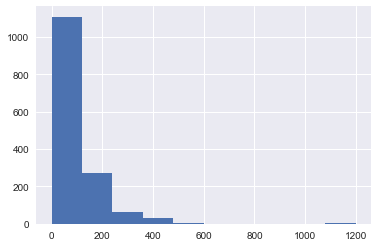

In [92]:
bgnew.hist()
plt.show()

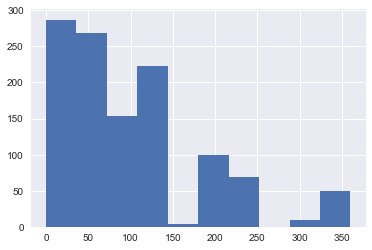

In [93]:
bgenew.hist()
plt.show()

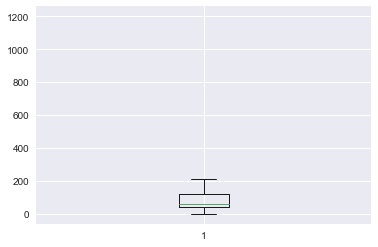

In [94]:
plt.boxplot(bgnew)
plt.show()

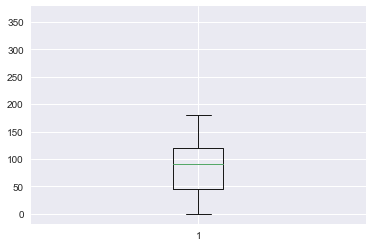

In [95]:
plt.boxplot(bgenew)
plt.show()

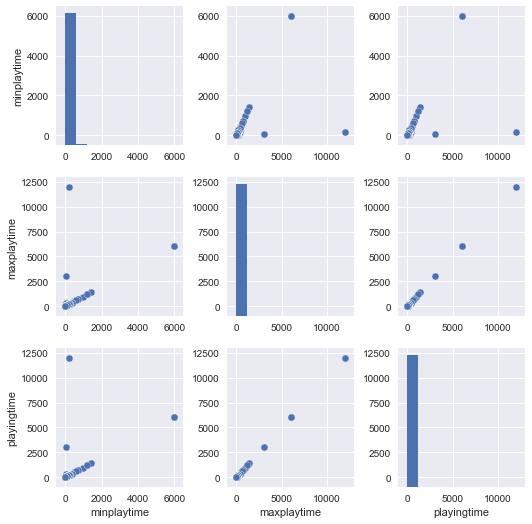

In [33]:
sns.pairplot(games[['minplaytime','maxplaytime','playingtime']])
plt.show()

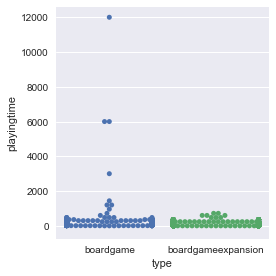

In [109]:
sns.factorplot(x="type",y="playingtime",data=games,kind = "swarm")
plt.show()

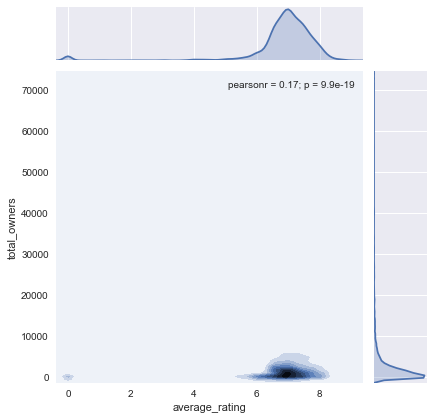

In [107]:
sns.jointplot(games['average_rating'],games['total_owners'], kind="kde")
plt.show()

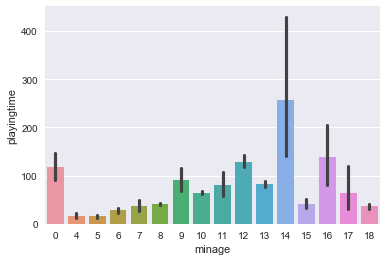

In [106]:
sns.barplot(games['minage'],games['playingtime'])
plt.show()

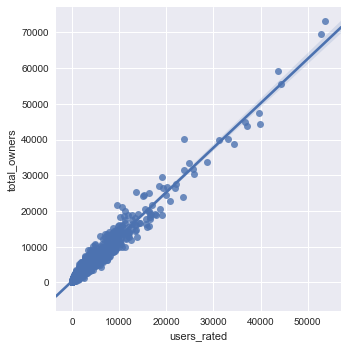

In [105]:
sns.lmplot(x="users_rated",y="total_owners",data = games)
plt.show()

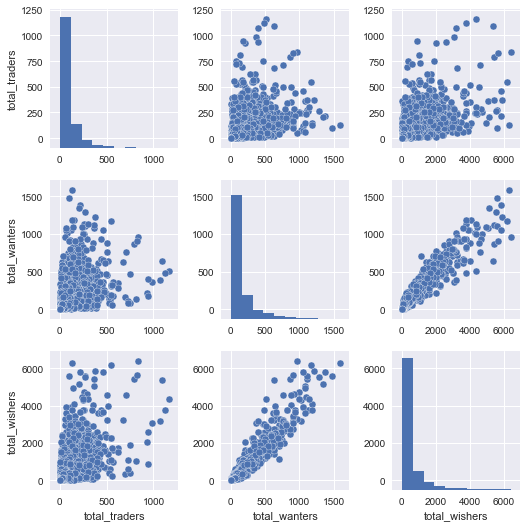

In [108]:
sns.pairplot(games[['total_traders','total_wanters','total_wishers']])
plt.show()

## Creating a model

In [96]:
levene(bgnew,bgenew)

LeveneResult(statistic=23.419123317166544, pvalue=1.3774862780819773e-06)

### Since p < 0.05, we  reject the Null Hypothesis.(Since, we preferred 95% Confidence Interval) which means the Variance are not equal.
###  Since the samples are drawn randomly from the population,We can't expect the variances to be equal.So,we need not consider it much

In [99]:
shapiro(bgnew)

(0.6403264999389648, 0.0)

In [100]:
shapiro(bgenew)

(0.8636946082115173, 1.2486535457146402e-30)

## Since p< 0.05 in both cases, we reject Null Hypthesis.So,they are not Normally distributed.

### Since the variables are not normally distributed and their variances are unequal. We can opt for  a non-parametric test for Unpaired Category : MannwhitneyU Test

## Mann -WhitneyU test

### NULL HYPOTHESIS: The playing time doesn't depend on the 'type' classification.
### (Mean(bgnew) = Mean(bgenew))
### ALTERNATE HYPOTHESIS: The playing time depends on the 'type' classification. 
### (Mean(bgnew) != Mean(bgenew))

In [101]:
u, p_value = mannwhitneyu(bgnew,bgenew)
print ("Mannwhitney Test  p-value=", p_value)

Mannwhitney Test  p-value= 0.00124581664807


### Since p< 0.05,We can reject the Null Hypothesis, which means the playingtime depends on type of the game
### (i.e., whether it is Boardgame or boardgame extension.) 

## Calculation of power of test for MannWhitneyU Test

## I was unable to get a power of test for MannwhitneyU test in any material or refernces.
## However, test of power in terms of t-test is included below.

In [112]:
bgnew.count()

1487

In [113]:
bgenew.count()

1165

In [114]:
## pooled SD
(np.mean(bgnew) - np.mean(bgenew)) / np.sqrt (((1487-1)*np.var(bgnew)+(1165-1)*np.var(bgenew))/1487+1165-2)

-0.072684939651874864

In [115]:
print(ttest_power(-0.072, nobs=2652, alpha=0.05, alternative='two-sided'))

0.95963947515


### The power of test is observed to be very high, but this is ttest_power which doesn't make any significance here.

### The END